In [115]:
# importing libraries
import numpy as np  # mathematical essentials
import matplotlib.pyplot as plt # data visualization
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier      # classification trees
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import seaborn           as sns                      # enhanced data viz
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler 
from sklearn.externals.six import StringIO           # saves objects in memory
from sklearn.tree import export_graphviz             # exports graphics
import pydotplus                                     # interprets dot objects
from IPython.display import Image                    # displays on frontend



# loading data
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
original_df.head(n = 5)




,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


In [116]:
#Engineering new colomns
original_df['Total_Cancellations'] = original_df['CANCELLATIONS_BEFORE_NOON'] + original_df['CANCELLATIONS_AFTER_NOON']
original_df['Total_Deliveries'] = original_df['EARLY_DELIVERIES'] + original_df['LATE_DELIVERIES']
original_df['Total_Lockers'] = original_df['PACKAGE_LOCKER'] + original_df['REFRIGERATED_LOCKER']
original_df['Total_Logins'] = original_df['MOBILE_LOGINS'] + original_df['PC_LOGINS'] 


In [117]:
original_df.to_excel('AC_feature_rich.xlsx',
                 index = False)
original_df = pd.read_excel('AC_feature_rich.xlsx') 

In [118]:
original_df.head(n = 5)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,Total_Cancellations,Total_Deliveries,Total_Lockers,Total_Logins
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,3,2,1,8
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,1,4,1,7
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,5,0,0,8
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,3,9,0,7
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,2,4,1,8


In [119]:
original_df  = original_df.drop([
                               'PC_LOGINS',
                               'MOBILE_LOGINS',
                               'CANCELLATIONS_AFTER_NOON',
                               'CANCELLATIONS_BEFORE_NOON',
                               'EARLY_DELIVERIES',
                               'LATE_DELIVERIES',
                               'PACKAGE_LOCKER',
                               'REFRIGERATED_LOCKER',
                                
                                   ],
                                axis = 1)
original_df.head(n = 5)



,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,TASTES_AND_PREFERENCES,WEEKLY_PLAN,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,Total_Cancellations,Total_Deliveries,Total_Lockers,Total_Logins
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,0,8,90,165.8,6,1,3,11,0,3,2,1,8
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,8,90,150.5,4,1,3,13,90,1,4,1,7
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,1,14,80,99.6,3,0,3,12,0,5,0,0,8
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,1,11,90,125.0,3,0,3,13,0,3,9,0,7
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,0,12,90,135.3,3,1,3,13,253,2,4,1,8


In [120]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
WEEKLY_PLAN                     1946 non-null int64
FOLLOWED_RECOMMENDATIONS_PCT    1946 non-null int64
AVG_PREP_VID_TIME               1946 non-null float64
LARGEST_ORDER_SIZE              1946 non-null int64

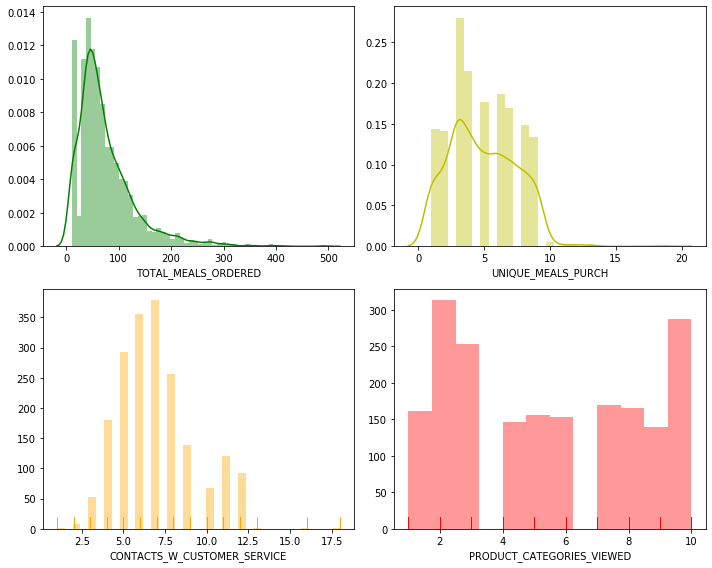

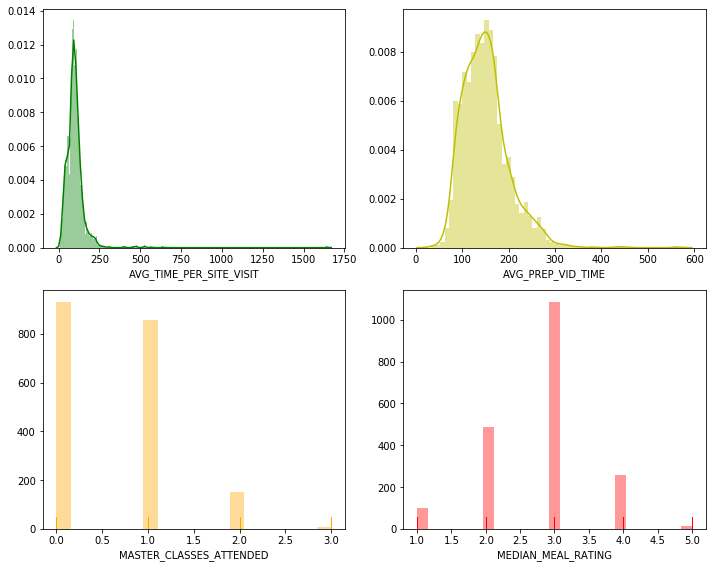

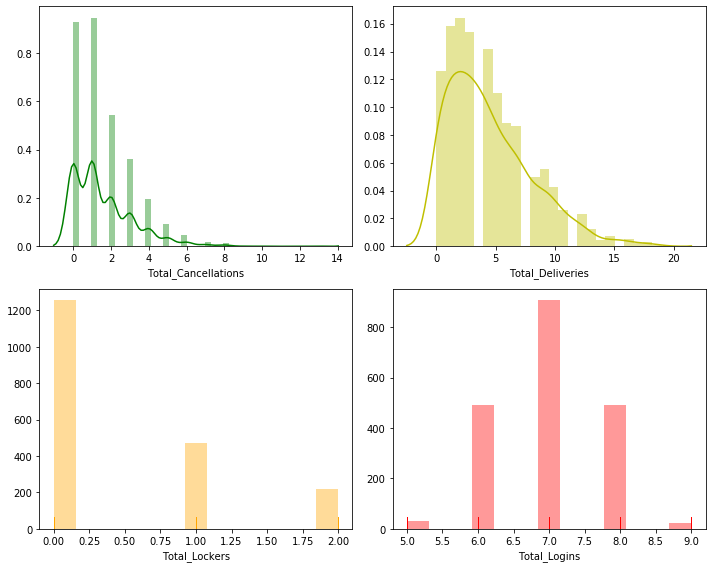

In [121]:

# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')
plt.tight_layout()
plt.show()


########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['Total_Cancellations'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Total_Cancellations')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['Total_Deliveries'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Total_Deliveries')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['Total_Lockers'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Total_Lockers')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['Total_Logins'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Total_Logins')
plt.tight_layout()
plt.show()



In [122]:
# setting outlier thresholds

total_meals_lo = 20
total_meals_hi = 200
unique_meals_lo = 2
unique_meals_hi = 9
contacts_w_customer_service_lo= 3
contacts_w_customer_service_hi = 12.5
product_categories_viewed_lo = 1
product_categories_viewed_hi = 10
avg_time_per_site_visit_lo = 10
avg_time_per_site_visit_hi = 250
avg_prep_vid_time_lo = 50
avg_prep_vid_time_hi = 300
master_classes_attended_lo = 1
master_classes_attended_hi = 2
median_meal_rating_lo = 2
median_meal_rating_hi = 4
Total_Cancellations_lo = 0
Total_Cancellations_hi = 4
Total_Deliveries_lo = 1
Total_Deliveries_hi = 10
Total_Lockers_lo = 0
Total_Lockers_hi =2
Total_Logins_lo = 6
Total_Logins_hi = 8





In [123]:
##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################
# developing features (columns) for outliers

#Total Meals
original_df['out_total_meals'] = 0
condition_hi = original_df.loc[0:,'out_total_meals'][original_df['TOTAL_MEALS_ORDERED'] > total_meals_hi]
condition_lo = original_df.loc[0:,'out_total_meals'][original_df['TOTAL_MEALS_ORDERED'] < total_meals_lo]
original_df['out_total_meals'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_total_meals'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Unique Meals

original_df['out_unique_meals'] = 0
condition_hi = original_df.loc[0:,'out_unique_meals'][original_df['UNIQUE_MEALS_PURCH'] > unique_meals_hi]
condition_lo = original_df.loc[0:,'out_unique_meals'][original_df['UNIQUE_MEALS_PURCH'] < unique_meals_lo]
original_df['out_unique_meals'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_unique_meals'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Contacts with customer service
original_df['out_contacts_w_customer_service'] = 0
condition_hi = original_df.loc[0:,'out_contacts_w_customer_service'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > contacts_w_customer_service_hi]
condition_lo = original_df.loc[0:,'out_contacts_w_customer_service'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < contacts_w_customer_service_lo]
original_df['out_contacts_w_customer_service'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_contacts_w_customer_service'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Product categories viewed
original_df['out_product_categories_viewed'] = 0
condition_hi = original_df.loc[0:,'out_product_categories_viewed'][original_df['PRODUCT_CATEGORIES_VIEWED'] > product_categories_viewed_hi]
condition_lo = original_df.loc[0:,'out_product_categories_viewed'][original_df['PRODUCT_CATEGORIES_VIEWED'] < product_categories_viewed_lo]
original_df['out_product_categories_viewed'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_product_categories_viewed'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Average time per site visit
original_df['out_avg_time_per_site_visit'] = 0
condition_hi = original_df.loc[0:,'out_avg_time_per_site_visit'][original_df['AVG_TIME_PER_SITE_VISIT'] > avg_time_per_site_visit_hi]
condition_lo = original_df.loc[0:,'out_avg_time_per_site_visit'][original_df['AVG_TIME_PER_SITE_VISIT'] < avg_time_per_site_visit_lo]
original_df['out_avg_time_per_site_visit'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_avg_time_per_site_visit'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Average prep video time
original_df['out_avg_prep_vid_time'] = 0
condition_hi = original_df.loc[0:,'out_avg_prep_vid_time'][original_df['AVG_PREP_VID_TIME'] > avg_prep_vid_time_hi]
condition_lo = original_df.loc[0:,'out_avg_prep_vid_time'][original_df['AVG_PREP_VID_TIME'] < avg_prep_vid_time_lo]
original_df['out_avg_prep_vid_time'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_avg_prep_vid_time'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#Master classes attended
original_df['out_master_classes_attended'] = 0
condition_hi = original_df.loc[0:,'out_master_classes_attended'][original_df['MASTER_CLASSES_ATTENDED'] > master_classes_attended_hi]
condition_lo = original_df.loc[0:,'out_master_classes_attended'][original_df['MASTER_CLASSES_ATTENDED'] < master_classes_attended_lo]
original_df['out_master_classes_attended'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_master_classes_attended'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#Median meal rating
original_df['out_median_meal_rating'] = 0
condition_hi = original_df.loc[0:,'out_median_meal_rating'][original_df['MASTER_CLASSES_ATTENDED'] > median_meal_rating_hi]
condition_lo = original_df.loc[0:,'out_median_meal_rating'][original_df['MASTER_CLASSES_ATTENDED'] < median_meal_rating_lo]
original_df['out_median_meal_rating'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_median_meal_rating'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Total Cancellations
original_df['out_Total_Cancellations'] = 0
condition_hi = original_df.loc[0:,'out_Total_Cancellations'][original_df['Total_Cancellations'] > Total_Cancellations_hi]
condition_lo = original_df.loc[0:,'out_Total_Cancellations'][original_df['Total_Cancellations'] < Total_Cancellations_lo]
original_df['out_Total_Cancellations'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_Total_Cancellations'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Total Deliveries
original_df['out_Total_Deliveries'] = 0
condition_hi = original_df.loc[0:,'out_Total_Deliveries'][original_df['Total_Deliveries'] > Total_Deliveries_hi]
condition_lo = original_df.loc[0:,'out_Total_Deliveries'][original_df['Total_Deliveries'] < Total_Deliveries_lo]
original_df['out_Total_Deliveries'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_Total_Deliveries'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Total Lockers
original_df['out_Total_Lockers'] = 0
condition_hi = original_df.loc[0:,'out_Total_Lockers'][original_df['Total_Lockers'] > Total_Lockers_hi]
condition_lo = original_df.loc[0:,'out_Total_Lockers'][original_df['Total_Lockers'] < Total_Lockers_lo]
original_df['out_Total_Lockers'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_Total_Lockers'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#Total Logins
original_df['out_Total_Logins'] = 0
condition_hi = original_df.loc[0:,'out_Total_Logins'][original_df['Total_Logins'] > Total_Logins_hi]
condition_lo = original_df.loc[0:,'out_Total_Logins'][original_df['Total_Logins'] < Total_Logins_lo]
original_df['out_Total_Logins'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['out_Total_Logins'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

In [124]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 37 columns):
REVENUE                            1946 non-null float64
CROSS_SELL_SUCCESS                 1946 non-null int64
NAME                               1946 non-null object
EMAIL                              1946 non-null object
FIRST_NAME                         1946 non-null object
FAMILY_NAME                        1899 non-null object
TOTAL_MEALS_ORDERED                1946 non-null int64
UNIQUE_MEALS_PURCH                 1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE        1946 non-null int64
PRODUCT_CATEGORIES_VIEWED          1946 non-null int64
AVG_TIME_PER_SITE_VISIT            1946 non-null float64
MOBILE_NUMBER                      1946 non-null int64
TASTES_AND_PREFERENCES             1946 non-null int64
WEEKLY_PLAN                        1946 non-null int64
FOLLOWED_RECOMMENDATIONS_PCT       1946 non-null int64
AVG_PREP_VID_TIME                  1946 non-null float64
LAR

In [125]:
original_df  = original_df.drop([
                               'TOTAL_MEALS_ORDERED',
                               'UNIQUE_MEALS_PURCH',
                               'CONTACTS_W_CUSTOMER_SERVICE',
                               'AVG_TIME_PER_SITE_VISIT',
                               'AVG_PREP_VID_TIME',
                               'MASTER_CLASSES_ATTENDED',
                               'MEDIAN_MEAL_RATING',
                               'Total_Cancellations',
                               'Total_Deliveries',
                               'Total_Lockers',
                               'Total_Logins',
                               'EMAIL',
                               'FIRST_NAME',
                               'FAMILY_NAME',
                               'NAME'
                                
                                   ],
                                axis = 1)

In [126]:
original_df.to_excel('AC_feature_rich.xlsx',
                 index = False)
original_df = pd.read_excel('AC_feature_rich.xlsx') 
original_df.head(5)

,REVENUE,CROSS_SELL_SUCCESS,PRODUCT_CATEGORIES_VIEWED,MOBILE_NUMBER,TASTES_AND_PREFERENCES,WEEKLY_PLAN,FOLLOWED_RECOMMENDATIONS_PCT,LARGEST_ORDER_SIZE,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,out_total_meals,out_unique_meals,out_contacts_w_customer_service,out_product_categories_viewed,out_avg_time_per_site_visit,out_avg_prep_vid_time,out_master_classes_attended,out_median_meal_rating,out_Total_Cancellations,out_Total_Deliveries,out_Total_Lockers,out_Total_Logins
0,1880.0,1,5,1,0,8,90,6,11,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1495.0,1,3,1,0,8,90,4,13,90,0,0,0,0,0,0,0,1,0,0,0,0
2,2572.5,1,3,1,1,14,80,3,12,0,0,1,0,0,0,0,1,1,1,1,0,0
3,1647.0,1,10,0,1,11,90,3,13,0,0,0,0,0,0,0,1,1,0,0,0,0
4,1923.0,1,9,1,0,12,90,3,13,253,0,0,0,0,0,0,0,1,0,0,0,0


In [127]:
df_corr = original_df.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)   

CROSS_SELL_SUCCESS                 1.00
FOLLOWED_RECOMMENDATIONS_PCT       0.46
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
out_Total_Cancellations            0.05
out_avg_prep_vid_time              0.02
LARGEST_ORDER_SIZE                 0.02
TOTAL_PHOTOS_VIEWED                0.01
out_Total_Deliveries               0.01
PRODUCT_CATEGORIES_VIEWED          0.00
REVENUE                            0.00
out_median_meal_rating            -0.00
WEEKLY_PLAN                       -0.01
out_avg_time_per_site_visit       -0.02
out_unique_meals                  -0.03
out_Total_Logins                  -0.03
AVG_CLICKS_PER_VISIT              -0.04
out_total_meals                   -0.04
out_master_classes_attended       -0.05
out_contacts_w_customer_service   -0.06
out_product_categories_viewed       NaN
out_Total_Lockers                   NaN
Name: CROSS_SELL_SUCCESS, dtype: float64

In [128]:
original_df  = original_df.drop([
                               'out_product_categories_viewed',
                               'out_Total_Lockers'
                               
                                
                                   ],
                                axis = 1)

In [129]:
original_df.to_excel('AC_feature_rich.xlsx',
                 index = False)
original_df = pd.read_excel('AC_feature_rich.xlsx') 
original_df.head(5)

,REVENUE,CROSS_SELL_SUCCESS,PRODUCT_CATEGORIES_VIEWED,MOBILE_NUMBER,TASTES_AND_PREFERENCES,WEEKLY_PLAN,FOLLOWED_RECOMMENDATIONS_PCT,LARGEST_ORDER_SIZE,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,out_total_meals,out_unique_meals,out_contacts_w_customer_service,out_avg_time_per_site_visit,out_avg_prep_vid_time,out_master_classes_attended,out_median_meal_rating,out_Total_Cancellations,out_Total_Deliveries,out_Total_Logins
0,1880.0,1,5,1,0,8,90,6,11,0,0,0,0,0,0,0,1,0,0,0
1,1495.0,1,3,1,0,8,90,4,13,90,0,0,0,0,0,0,1,0,0,0
2,2572.5,1,3,1,1,14,80,3,12,0,0,1,0,0,0,1,1,1,1,0
3,1647.0,1,10,0,1,11,90,3,13,0,0,0,0,0,0,1,1,0,0,0
4,1923.0,1,9,1,0,12,90,3,13,253,0,0,0,0,0,0,1,0,0,0


In [130]:
df_corr = original_df.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)   

CROSS_SELL_SUCCESS                 1.00
FOLLOWED_RECOMMENDATIONS_PCT       0.46
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
out_Total_Cancellations            0.05
out_avg_prep_vid_time              0.02
LARGEST_ORDER_SIZE                 0.02
TOTAL_PHOTOS_VIEWED                0.01
out_Total_Deliveries               0.01
PRODUCT_CATEGORIES_VIEWED          0.00
REVENUE                            0.00
out_median_meal_rating            -0.00
WEEKLY_PLAN                       -0.01
out_avg_time_per_site_visit       -0.02
out_unique_meals                  -0.03
out_Total_Logins                  -0.03
AVG_CLICKS_PER_VISIT              -0.04
out_total_meals                   -0.04
out_master_classes_attended       -0.05
out_contacts_w_customer_service   -0.06
Name: CROSS_SELL_SUCCESS, dtype: float64

In [131]:
# declaring explanatory variables
original_df_data = original_df.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
original_df_target = original_df.loc[ : , 'CROSS_SELL_SUCCESS']

In [132]:
original_df_data.corr()

,REVENUE,PRODUCT_CATEGORIES_VIEWED,MOBILE_NUMBER,TASTES_AND_PREFERENCES,WEEKLY_PLAN,FOLLOWED_RECOMMENDATIONS_PCT,LARGEST_ORDER_SIZE,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,out_total_meals,out_unique_meals,out_contacts_w_customer_service,out_avg_time_per_site_visit,out_avg_prep_vid_time,out_master_classes_attended,out_median_meal_rating,out_Total_Cancellations,out_Total_Deliveries,out_Total_Logins
REVENUE,1.000000,0.034492,0.031247,0.007847,0.009794,-0.018836,0.435201,-0.553810,0.465951,-0.123587,0.257479,-0.062178,0.054554,0.147639,-0.449578,-0.221534,0.015797,-0.010291,0.010202
PRODUCT_CATEGORIES_VIEWED,0.034492,1.000000,-0.016307,-0.012549,-0.005767,-0.016346,0.010750,-0.008948,0.025072,-0.047210,-0.016252,-0.022878,0.035700,0.044257,0.007075,0.034750,0.035664,0.064850,-0.023550
MOBILE_NUMBER,0.031247,-0.016307,1.000000,0.003472,-0.032766,0.054769,0.030302,-0.028934,0.004093,-0.032590,0.034092,-0.030701,-0.008615,0.003300,-0.013436,-0.000457,-0.030880,0.003146,0.054198
TASTES_AND_PREFERENCES,0.007847,-0.012549,0.003472,1.000000,0.046895,0.020916,0.010166,-0.007522,-0.027637,-0.005924,0.014713,0.020758,0.008056,0.013580,-0.052359,-0.002394,0.011962,0.005664,-0.056872
WEEKLY_PLAN,0.009794,-0.005767,-0.032766,0.046895,1.000000,-0.031816,0.025511,-0.012518,0.003195,0.000424,-0.000551,0.014532,0.019676,-0.010261,-0.010645,-0.025456,-0.046454,-0.014338,0.015048
FOLLOWED_RECOMMENDATIONS_PCT,-0.018836,-0.016346,0.054769,0.020916,-0.031816,1.000000,-0.028181,0.013995,0.012914,0.012222,-0.036248,-0.023453,-0.030340,-0.029778,-0.032342,-0.001842,0.045622,0.007331,-0.032397
LARGEST_ORDER_SIZE,0.435201,0.010750,0.030302,0.010166,0.025511,-0.028181,1.000000,-0.348697,0.287012,-0.080020,-0.065418,-0.043356,0.092875,0.166649,-0.310872,-0.167031,0.022893,-0.011514,-0.034043
AVG_CLICKS_PER_VISIT,-0.553810,-0.008948,-0.028934,-0.007522,-0.012518,0.013995,-0.348697,1.000000,-0.337257,0.158783,0.042407,0.050362,-0.041849,-0.087764,0.322763,0.103232,-0.004677,-0.000102,-0.025186
TOTAL_PHOTOS_VIEWED,0.465951,0.025072,0.004093,-0.027637,0.003195,0.012914,0.287012,-0.337257,1.000000,0.012324,-0.001869,-0.038493,0.048267,0.093324,-0.269986,-0.128322,0.020870,0.012395,-0.043930
out_total_meals,-0.123587,-0.047210,-0.032590,-0.005924,0.000424,0.012222,-0.080020,0.158783,0.012324,1.000000,0.078708,-0.014623,-0.014155,0.049798,0.157842,0.033579,0.053355,0.036317,0.006742


In [133]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 508,
            stratify = original_df_target)


# merging training data for statsmodels
original_df_train = pd.concat([X_train, y_train], axis = 1)

In [134]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ FOLLOWED_RECOMMENDATIONS_PCT """,
                           data    = original_df_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.495292
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Feb 2020   Pseudo R-squ.:                  0.2113
Time:                        21:03:04   Log-Likelihood:                -722.63
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 3.498e-86
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.8273      0.103     -8.009      0.000      -1.030      -0.625
FOLLOWED_RECOMMENDATIONS_PCT     0.0554      0.004     15.255      0.000       0.048       0.063
================================================================================================
"""

In [135]:
test = original_df.copy()

In [136]:
X_train = test.drop("CROSS_SELL_SUCCESS", axis=1)
Y_train = test["CROSS_SELL_SUCCESS"]


In [137]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
for val in original_df_data:
    print(f"{val} +")

REVENUE +
PRODUCT_CATEGORIES_VIEWED +
MOBILE_NUMBER +
TASTES_AND_PREFERENCES +
WEEKLY_PLAN +
FOLLOWED_RECOMMENDATIONS_PCT +
LARGEST_ORDER_SIZE +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
out_total_meals +
out_unique_meals +
out_contacts_w_customer_service +
out_avg_time_per_site_visit +
out_avg_prep_vid_time +
out_master_classes_attended +
out_median_meal_rating +
out_Total_Cancellations +
out_Total_Deliveries +
out_Total_Logins +


In [139]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~ 
                                                             REVENUE +
PRODUCT_CATEGORIES_VIEWED +
MOBILE_NUMBER +
TASTES_AND_PREFERENCES +
WEEKLY_PLAN +
FOLLOWED_RECOMMENDATIONS_PCT +
LARGEST_ORDER_SIZE +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
out_total_meals +
out_unique_meals +
out_contacts_w_customer_service +
out_avg_time_per_site_visit +
out_avg_prep_vid_time +
out_master_classes_attended +
out_median_meal_rating +
out_Total_Cancellations +
out_Total_Deliveries +
out_Total_Logins   """,
                                           data = original_df_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.479156
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1439
Method:                           MLE   Df Model:                           19
Date:                Thu, 06 Feb 2020   Pseudo R-squ.:                  0.2370
Time:                        21:03:04   Log-Likelihood:                -699.09
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 3.275e-80
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -1.4674      0.720     -2.038      0.042      -2.879      -0.056
REVENUE                         -8.611e-05   8.68e-05     -0.992      0.321      -0.000     8.4e-05
PRODUCT_CATEGORIES_VIEWED           0.0166      0.022      0.768      0.443      -0.026       0.059
MOBILE_NUMBER                       0.6358      0.197      3.233      0.001       0.250       1.021
TASTES_AND_PREFERENCES              0.5270      0.143      3.698      0.000       0.248       0.806
WEEKLY_PLAN                        -0.0008      0.005     -0.167      0.867      -0.010       0.009
FOLLOWED_RECOMMENDATIONS_PCT        0.0570      0.004     15.087      0.000       0.050       0.064
LARGEST_ORDER_SIZE                  0.0648      0.048      1.355      0.175      -0.029       0.159
AVG_CLICKS_PER_VISIT               -0.0324      0.035     -0.932      0.351      -0.101       0.036
TOTAL_PHOTOS_VIEWED                -0.0004      0.000     -0.817      0.414      -0.001       0.001
out_total_meals                    -0.0973      0.191     -0.509      0.611      -0.472       0.277
out_unique_meals                   -0.1789      0.239     -0.748      0.455      -0.648       0.290
out_contacts_w_customer_service    -1.9041      0.898     -2.120      0.034      -3.664      -0.144
out_avg_time_per_site_visit        -0.8441      0.666     -1.267      0.205      -2.150       0.461
out_avg_prep_vid_time               1.0404      0.670      1.553      0.120      -0.273       2.354
out_master_classes_attended        -0.1785      0.155     -1.150      0.250      -0.483       0.126
out_median_meal_rating              0.0748      0.256      0.293      0.770      -0.426       0.576
out_Total_Cancellations             0.4397      0.292      1.508      0.132      -0.132       1.011
out_Total_Deliveries                0.1392      0.180      0.773      0.440      -0.214       0.492
out_Total_Logins                   -0.3690      0.359     -1.028      0.304      -1.073       0.335
===================================================================================================
"""

In [140]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [141]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'PRODUCT_CATEGORIES_VIEWED', 'MOBILE_NUMBER', 'TASTES_AND_PREFERENCES', 'WEEKLY_PLAN', 
                   'FOLLOWED_RECOMMENDATIONS_PCT', 'LARGEST_ORDER_SIZE', 'AVG_CLICKS_PER_VISIT',
                   'TOTAL_PHOTOS_VIEWED', 'out_total_meals', 'out_unique_meals','out_contacts_w_customer_service','out_avg_time_per_site_visit',
                  'out_avg_prep_vid_time','out_master_classes_attended','out_median_meal_rating','out_Total_Cancellations','out_Total_Deliveries','out_Total_Logins'],
 
 # significant variables only
 'logit_sig'    : ['FOLLOWED_RECOMMENDATIONS_PCT' , 'MOBILE_NUMBER', 'TASTES_AND_PREFERENCES',
                   ]

}


In [142]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


Significant p-value Model:
--------------------------
{candidate_dict['logit_sig']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['REVENUE', 'PRODUCT_CATEGORIES_VIEWED', 'MOBILE_NUMBER', 'TASTES_AND_PREFERENCES', 'WEEKLY_PLAN', 'FOLLOWED_RECOMMENDATIONS_PCT', 'LARGEST_ORDER_SIZE', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'out_total_meals', 'out_unique_meals', 'out_contacts_w_customer_service', 'out_avg_time_per_site_visit', 'out_avg_prep_vid_time', 'out_master_classes_attended', 'out_median_meal_rating', 'out_Total_Cancellations', 'out_Total_Deliveries', 'out_Total_Logins']


Significant p-value Model:
--------------------------
['FOLLOWED_RECOMMENDATIONS_PCT', 'MOBILE_NUMBER', 'TASTES_AND_PREFERENCES']



In [143]:
# train/test split with the full model
original_df_data   =  original_df.loc[ : , candidate_dict['logit_sig']]
original_df_target =  original_df.loc[ : , 'FOLLOWED_RECOMMENDATIONS_PCT']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            random_state = 802,
            test_size    = 0.25,
            stratify     = original_df_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 802)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training ACCURACY: 0.66
Testing  ACCURACY: 0.6427


In [144]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred,
                      ))

[[ 39   0   0   0   0   0   0   0   0   0]
 [  0 101   0   0   0   0   0   0   0   0]
 [  0   0  90   0   0   0   0   0   0   0]
 [  0   0  61   0   0   0   0   0   0   0]
 [  0   0  24   0   0   0   0   0   0   0]
 [  0   0  12  23   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0  35   0   0]
 [  0   0   0   0   0   0   0  40   8   0]
 [  0   0   0   0   0   0   0   8  27   0]
 [  0   0   0   0   0   0   0   0   0  16]]


In [145]:
y_test

1927    30
73      80
1179    10
1758    30
1076     0
1767    30
1884    30
907     10
79      90
1442    20
600     40
428     50
32      80
1892    30
955     20
404     60
1701    20
359     80
718     40
258     60
1102    20
663     40
656     50
738     40
972     20
896     30
1295    10
1646    30
595     40
1668    30
808     40
1678    20
386     70
1480    10
1265    10
1015    30
208     60
492     70
1378    20
297     80
813     20
368     80
385     70
1783    10
1056    20
548     60
1440     0
958     10
1277    10
1470     0
1839    10
1729    20
93      80
1533    30
940     20
679     60
387     70
376     70
701     30
409     50
1285    10
1451    10
1226    10
192     70
268     60
812     20
944     30
1736    20
1613    10
802     20
1222    10
1754    10
1610    20
168     70
1407    20
327     70
694     40
1865    10
791     20
1267     0
1514    10
858     40
1394    10
1857    20
1133    10
1406    20
557     50
1691    30
1       90
1854    10
974     10

In [146]:
y_pred = logreg_pred
logreg_pred

array([20, 80, 10, 20,  0, 20, 20, 10, 90, 20, 20, 30, 80, 20, 20, 70, 20,
       80, 20, 70, 20, 20, 30, 20, 20, 20, 10, 20, 20, 20, 20, 20, 70, 10,
       10, 20, 70, 70, 20, 80, 20, 80, 80, 10, 20, 70,  0, 10, 10,  0, 10,
       20, 80, 20, 20, 70, 70, 70, 20, 30, 10, 10, 10, 70, 70, 20, 20, 20,
       10, 20, 10, 10, 20, 80, 20, 70, 20, 10, 20,  0, 10, 20, 10, 20, 10,
       20, 20, 20, 90, 10, 10, 70,  0, 80, 20, 20, 20, 20, 20, 20, 20, 20,
       70, 30, 10, 20, 20, 80, 10, 70, 10, 30, 20, 20, 20, 10, 70, 20, 10,
       70, 70, 20, 80, 80, 70, 10, 10,  0, 10, 20, 70, 30, 10, 90, 20, 10,
       70, 20, 20, 70, 20, 30, 20, 30, 70, 30, 70, 20, 10, 70, 10, 10, 10,
        0,  0, 30, 20,  0, 10, 30, 20, 20, 20, 20, 20, 30, 10, 10, 70, 20,
       20, 20, 10, 70, 20, 70, 20,  0, 70,  0, 10,  0, 70,  0, 10, 10, 20,
        0, 20, 70,  0, 10, 10, 70, 10, 10, 70, 20, 80, 80, 20, 20, 90,  0,
       70, 70, 50, 20, 20, 10, 20, 70,  0, 10, 20, 10, 10, 20, 10, 20, 20,
       20, 20, 30, 80, 80

In [147]:
y=test.CROSS_SELL_SUCCESS
x=test.drop('CROSS_SELL_SUCCESS',axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [148]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 802)


# FITTING the training data
logreg_fit = logreg.fit(xTrain,yTrain )


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(xTest)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(xTrain,yTrain).round(4))
print('Testing  ACCURACY:', logreg_fit.score(xTest,yTest ).round(4))

Training ACCURACY: 0.6614
Testing  ACCURACY: 0.6961


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [149]:
print(confusion_matrix(y_true = yTest,
                       y_pred = logreg_pred,
                      ))

[[ 69  76]
 [ 72 270]]


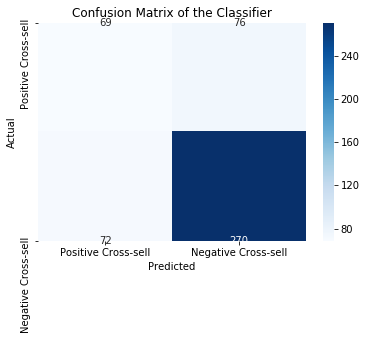

In [150]:
visual_cm(true_y = yTest,
          pred_y = logreg_pred,
          labels = ['Positive Cross-sell', 'Negative Cross-sell'])

In [151]:
roc_auc_score(y_true  = yTest,
              y_score = logreg_pred)

0.6326678765880218

In [152]:
from sklearn.externals.six import StringIO           # saves objects in memory
from sklearn.tree import export_graphviz             # exports graphics
import pydotplus                                     # interprets dot objects
from IPython.display import Image                    # displays on frontend

def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = xTrain.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

Training ACCURACY: 0.7587
Testing  ACCURACY: 0.7495
AUC Score        : 0.7998


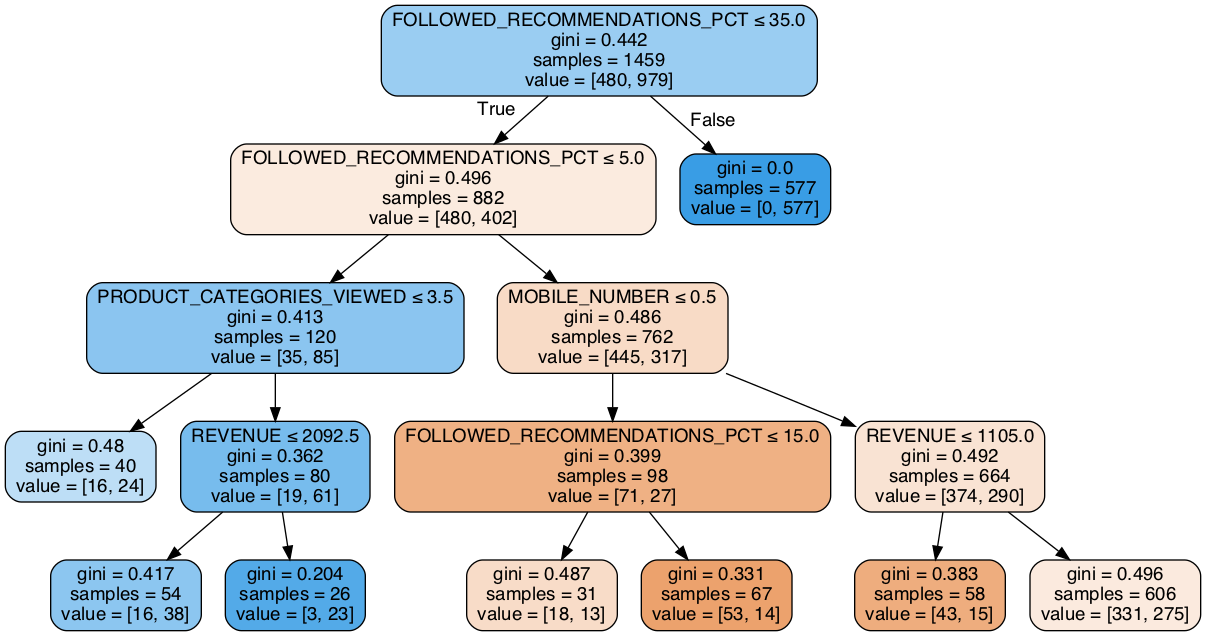

In [153]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 802)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(xTrain, yTrain)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(xTest)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(xTrain, yTrain).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(xTest, yTest).round(4))
print('AUC Score        :', roc_auc_score(y_true  = yTest,
                                          y_score = tree_pred).round(4))


# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = xTrain)

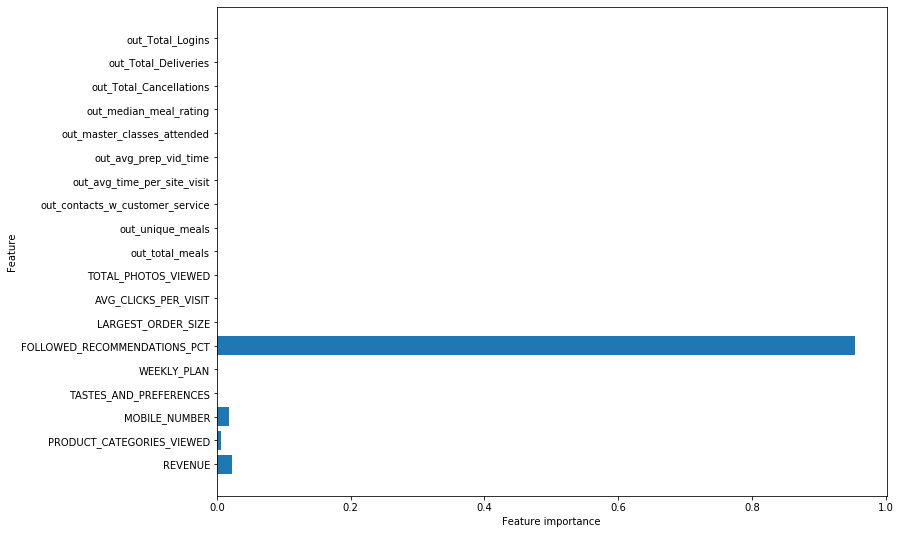

In [154]:
plot_feature_importances(tree_pruned_fit,
                         train = xTrain,
                         export = False)